In [8]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [9]:
df0 = pd.read_csv('bengaluru_house_prices.csv')
df0.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [10]:
df1 = df0.drop(['area_type','availability','society'],axis = 'columns')
df1.head()

,location,size,total_sqft,bath,balcony,price
0,Electronic City Phase II,2 BHK,1056,2.0,1.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,3.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,3.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,1.0,95.00
4,Kothanur,2 BHK,1200,2.0,1.0,51.00


In [11]:
df1.isna().sum()

location        1
size           16
total_sqft      0
bath           73
balcony       609
price           0
dtype: int64

In [12]:
df2 = df1.dropna()
df2.head()

,location,size,total_sqft,bath,balcony,price
0,Electronic City Phase II,2 BHK,1056,2.0,1.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,3.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,3.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,1.0,95.00
4,Kothanur,2 BHK,1200,2.0,1.0,51.00


In [13]:
df2.isna().sum()

location      0
size          0
total_sqft    0
bath          0
balcony       0
price         0
dtype: int64

In [14]:
df2['size'].unique()

array(['2 BHK', '4 Bedroom', '3 BHK', '3 Bedroom', '1 BHK', '1 RK',
       '4 BHK', '1 Bedroom', '2 Bedroom', '6 Bedroom', '8 Bedroom',
       '7 Bedroom', '5 BHK', '7 BHK', '6 BHK', '5 Bedroom', '11 BHK',
       '9 BHK', '9 Bedroom', '27 BHK', '11 Bedroom', '43 Bedroom',
       '14 BHK', '8 BHK', '12 Bedroom', '10 Bedroom', '13 BHK'],
      dtype=object)

In [15]:
df2['BHK'] = df2['size'].apply(lambda x: int(x.split(' ')[0]))

C:\Users\manoj\AppData\Local\Temp\ipykernel_21112\1853734267.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['BHK'] = df2['size'].apply(lambda x: int(x.split(' ')[0]))


In [16]:
df2.head()

,location,size,total_sqft,bath,balcony,price,BHK
0,Electronic City Phase II,2 BHK,1056,2.0,1.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600,5.0,3.0,120.00,4
2,Uttarahalli,3 BHK,1440,2.0,3.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521,3.0,1.0,95.00,3
4,Kothanur,2 BHK,1200,2.0,1.0,51.00,2


In [17]:
df2.BHK.unique()

array([ 2,  4,  3,  1,  6,  8,  7,  5, 11,  9, 27, 43, 14, 12, 10, 13])

In [18]:
df2[df2.BHK>20]

,location,size,total_sqft,bath,balcony,price,BHK
1718,2Electronic City Phase II,27 BHK,8000,27.0,0.0,230.0,27
4684,Munnekollal,43 Bedroom,2400,40.0,0.0,660.0,43


In [19]:
df2.total_sqft.unique()

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      shape=(1976,), dtype=object)

In [20]:
def is_float(x):
    try:
        float(x)
    except:
        return False
    return True

In [21]:
df2[~df2['total_sqft'].apply(is_float)].head()

,location,size,total_sqft,bath,balcony,price,BHK
30,Yelahanka,4 BHK,2100 - 2850,4.0,0.0,186.000,4
122,Hebbal,4 BHK,3067 - 8156,4.0,0.0,477.000,4
137,8th Phase JP Nagar,2 BHK,1042 - 1105,2.0,0.0,54.005,2
165,Sarjapur,2 BHK,1145 - 1340,2.0,0.0,43.490,2
188,KR Puram,2 BHK,1015 - 1540,2.0,0.0,56.800,2


In [22]:
def range_to_num(x):
    tokens = x.split('-')
    if len(tokens) == 2:
        return (float(tokens[0]) + float(tokens[1]))/2
    try:
        return float(x)
    except:
        return None

In [23]:
range_to_num('54')

54.0

In [24]:
range_to_num('5-4')

4.5

In [25]:
df3 = df2.copy()
df3['total_sqft'] = df3['total_sqft'].apply(range_to_num)
df3.head()

,location,size,total_sqft,bath,balcony,price,BHK
0,Electronic City Phase II,2 BHK,1056.0,2.0,1.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,3.0,120.00,4
2,Uttarahalli,3 BHK,1440.0,2.0,3.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521.0,3.0,1.0,95.00,3
4,Kothanur,2 BHK,1200.0,2.0,1.0,51.00,2


In [26]:
df3.isna().sum()

location       0
size           0
total_sqft    42
bath           0
balcony        0
price          0
BHK            0
dtype: int64

In [27]:
df3.iloc[0]

location      Electronic City Phase II
size                             2 BHK
total_sqft                      1056.0
bath                               2.0
balcony                            1.0
price                            39.07
BHK                                  2
Name: 0, dtype: object

In [28]:
df3.dropna()

,location,size,total_sqft,bath,balcony,price,BHK
0,Electronic City Phase II,2 BHK,1056.0,2.0,1.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,3.0,120.00,4
2,Uttarahalli,3 BHK,1440.0,2.0,3.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521.0,3.0,1.0,95.00,3
4,Kothanur,2 BHK,1200.0,2.0,1.0,51.00,2
...,...,...,...,...,...,...,...
13314,Green Glen Layout,3 BHK,1715.0,3.0,3.0,112.00,3
13315,Whitefield,5 Bedroom,3453.0,4.0,0.0,231.00,5
13317,Raja Rajeshwari Nagar,2 BHK,1141.0,2.0,1.0,60.00,2
13318,Padmanabhanagar,4 BHK,4689.0,4.0,1.0,488.00,4


In [29]:
df3['total_sqft'].isna().sum()

np.int64(42)

In [30]:
df3 = df3.dropna()

In [31]:
print(df3),df3.shape

                       location       size  total_sqft  bath  balcony   price  \
0      Electronic City Phase II      2 BHK      1056.0   2.0      1.0   39.07   
1              Chikka Tirupathi  4 Bedroom      2600.0   5.0      3.0  120.00   
2                   Uttarahalli      3 BHK      1440.0   2.0      3.0   62.00   
3            Lingadheeranahalli      3 BHK      1521.0   3.0      1.0   95.00   
4                      Kothanur      2 BHK      1200.0   2.0      1.0   51.00   
...                         ...        ...         ...   ...      ...     ...   
13314         Green Glen Layout      3 BHK      1715.0   3.0      3.0  112.00   
13315                Whitefield  5 Bedroom      3453.0   4.0      0.0  231.00   
13317     Raja Rajeshwari Nagar      2 BHK      1141.0   2.0      1.0   60.00   
13318           Padmanabhanagar      4 BHK      4689.0   4.0      1.0  488.00   
13319              Doddathoguru      1 BHK       550.0   1.0      1.0   17.00   

       BHK  
0        2  
1

(None, (12668, 7))

In [32]:
df4 = df3.copy()
df4['price_per_sqft'] = df4['total_sqft']*100000/df4['price']
df4

,location,size,total_sqft,bath,balcony,price,BHK,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,1.0,39.07,2,2.702841e+06
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,3.0,120.00,4,2.166667e+06
2,Uttarahalli,3 BHK,1440.0,2.0,3.0,62.00,3,2.322581e+06
3,Lingadheeranahalli,3 BHK,1521.0,3.0,1.0,95.00,3,1.601053e+06
4,Kothanur,2 BHK,1200.0,2.0,1.0,51.00,2,2.352941e+06
...,...,...,...,...,...,...,...,...
13314,Green Glen Layout,3 BHK,1715.0,3.0,3.0,112.00,3,1.531250e+06
13315,Whitefield,5 Bedroom,3453.0,4.0,0.0,231.00,5,1.494805e+06
13317,Raja Rajeshwari Nagar,2 BHK,1141.0,2.0,1.0,60.00,2,1.901667e+06
13318,Padmanabhanagar,4 BHK,4689.0,4.0,1.0,488.00,4,9.608607e+05


In [33]:
len(df4.location.unique())

1259

In [34]:
df4.location = df4.location.apply(lambda x: x.strip())
location_stats = df4.groupby('location')['location'].agg('count')
location_stats.sort_values(ascending = False)

location
Whitefield                         514
Sarjapur  Road                     372
Electronic City                    302
Kanakpura Road                     259
Thanisandra                        233
                                  ... 
1st Stage Radha Krishna Layout       1
asha township, off hennur road       1
banashankari stage iii sa            1
basaveshwarnagar                     1
beml layout, basaveshwara nagar      1
Name: location, Length: 1248, dtype: int64

In [35]:
len(location_stats[location_stats<=10])

1013

In [36]:
less_than_10 = location_stats[location_stats<=10]

In [37]:
df4.location = df4.location.apply(lambda x: 'other' if x in less_than_10 else x )
len(df4.location.unique())

236

In [38]:
df4.total_sqft.mean()

np.float64(1511.8351669561098)

In [39]:
df4.total_sqft.std()

np.float64(1162.0972760538443)

In [40]:
df4[df4.total_sqft/df4.BHK<=300].head()

,location,size,total_sqft,bath,balcony,price,BHK,price_per_sqft
58,Murugeshpalya,6 Bedroom,1407.0,4.0,1.0,150.0,6,9.380000e+05
68,Devarachikkanahalli,8 Bedroom,1350.0,7.0,0.0,85.0,8,1.588235e+06
70,other,3 Bedroom,500.0,3.0,2.0,100.0,3,5.000000e+05
78,Kaval Byrasandra,2 BHK,460.0,1.0,0.0,22.0,2,2.090909e+06
89,Rajaji Nagar,6 Bedroom,710.0,6.0,3.0,160.0,6,4.437500e+05


In [41]:
df4.shape

(12668, 8)

In [42]:
df5 = df4[~(df4.total_sqft/df4.BHK<=300)]
df5.head()

,location,size,total_sqft,bath,balcony,price,BHK,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,1.0,39.07,2,2.702841e+06
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,3.0,120.00,4,2.166667e+06
2,Uttarahalli,3 BHK,1440.0,2.0,3.0,62.00,3,2.322581e+06
3,Lingadheeranahalli,3 BHK,1521.0,3.0,1.0,95.00,3,1.601053e+06
4,Kothanur,2 BHK,1200.0,2.0,1.0,51.00,2,2.352941e+06


In [43]:
df5.price_per_sqft.describe()

count    1.184700e+04
mean     1.972863e+06
std      9.040193e+05
min      5.666667e+04
25%      1.481481e+06
50%      1.913043e+06
75%      2.387936e+06
max      3.733714e+07
Name: price_per_sqft, dtype: float64

In [44]:
def remove_pps_outliers(df):
    df_out = pd.DataFrame()
    for key, subdf in df.groupby('location'):
        m = np.mean(subdf.price_per_sqft)
        st = np.std(subdf.price_per_sqft)
        reduced_df = subdf[(subdf.price_per_sqft>(m-st)) & (subdf.price_per_sqft<=(m+st))]
        df_out = pd.concat([df_out,reduced_df],ignore_index=True)
    return df_out
df6 = remove_pps_outliers(df5)
df6.shape

(8861, 8)

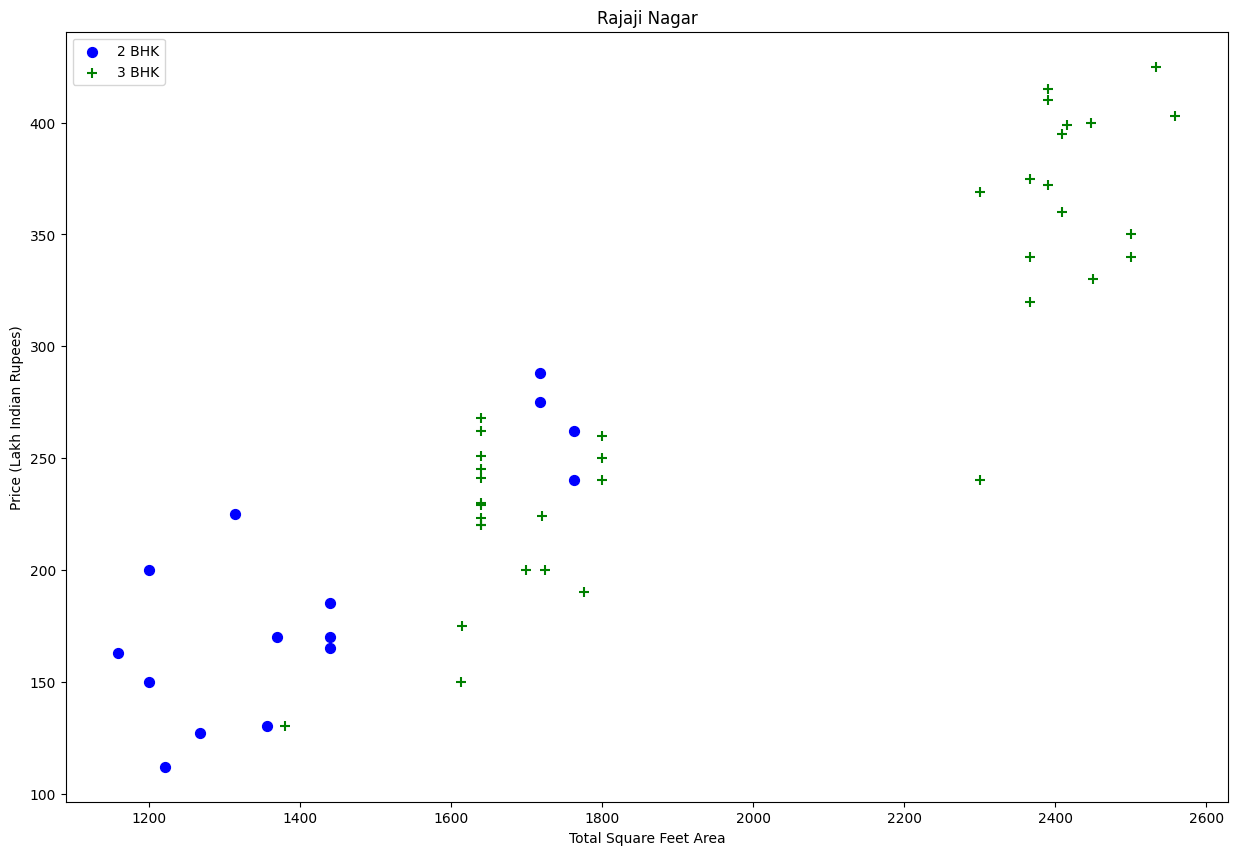

In [45]:
import matplotlib
def plot_scatter_chart(df,location):
    bhk2 = df[(df.location==location) & (df.BHK==2)]
    bhk3 = df[(df.location==location) & (df.BHK==3)]
    matplotlib.rcParams['figure.figsize'] = (15,10)
    plt.scatter(bhk2.total_sqft,bhk2.price,color='blue',label='2 BHK', s=50)
    plt.scatter(bhk3.total_sqft,bhk3.price,marker='+', color='green',label='3 BHK', s=50)
    plt.xlabel("Total Square Feet Area")
    plt.ylabel("Price (Lakh Indian Rupees)")
    plt.title(location)
    plt.legend()
    
plot_scatter_chart(df6,"Rajaji Nagar")

In [46]:
# df7 = df6.copy()
def remove_bhk_outliers(df):
    exclude_indices = np.array([])
    for location, location_df in df.groupby('location'):
        bhk_stats = {}
        for bhk, bhk_df in location_df.groupby('BHK'):
            bhk_stats[bhk] = {
                'mean': np.mean(bhk_df.price_per_sqft),
                'std': np.std(bhk_df.price_per_sqft),
                'count': bhk_df.shape[0]
            }
        for bhk, bhk_df in location_df.groupby('BHK'):
            stats = bhk_stats.get(bhk-1)
            if stats and stats['count']>5:
                exclude_indices = np.append(exclude_indices, bhk_df[bhk_df.price_per_sqft<(stats['mean'])].index.values)
    return df.drop(exclude_indices,axis='index')
df7 = remove_bhk_outliers(df6)
df7.shape

(5858, 8)

In [47]:
df7.bath.unique()

array([ 4.,  3.,  2.,  5.,  8.,  1.,  6.,  7.,  9., 13.])

Text(0, 0.5, 'Count')

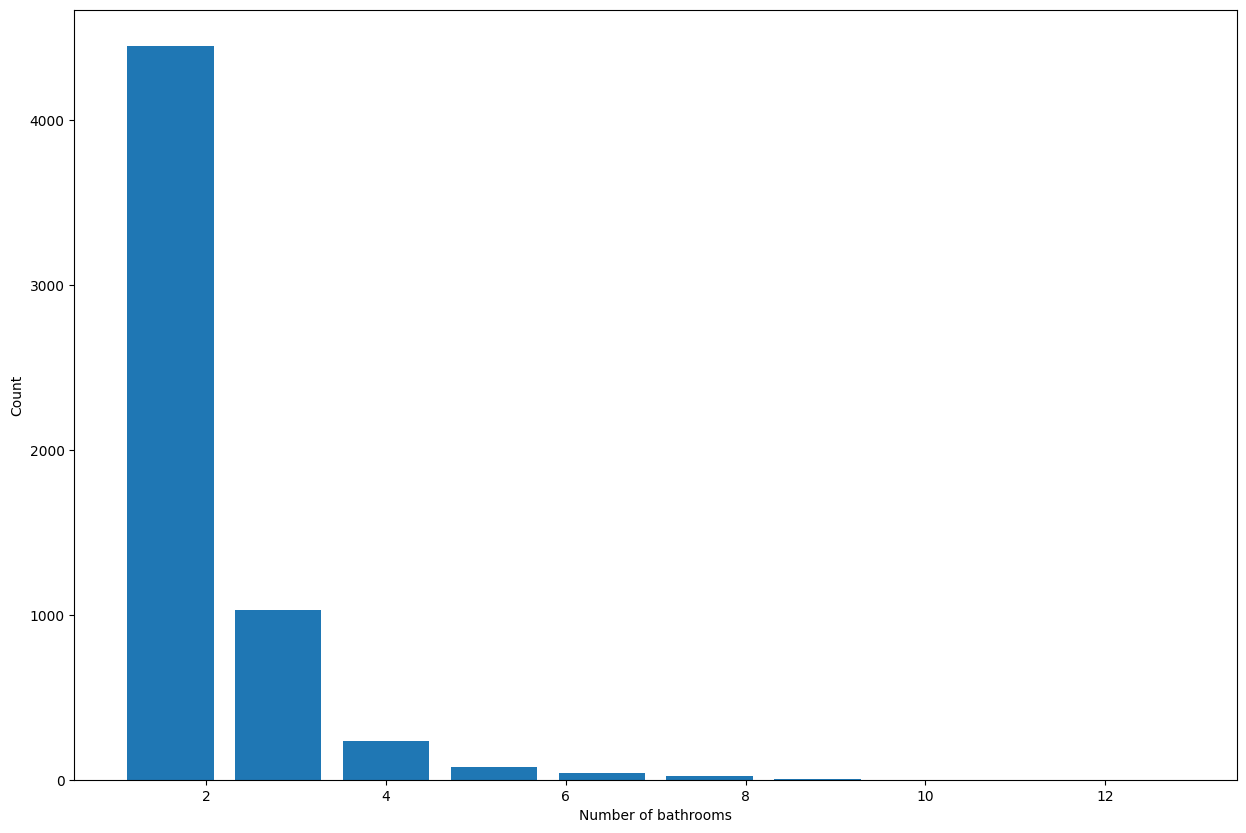

In [48]:
plt.hist(df7.bath,rwidth=0.8)
plt.xlabel("Number of bathrooms")
plt.ylabel("Count")

In [49]:
df7[df7.bath>df7.BHK+2]

,location,size,total_sqft,bath,balcony,price,BHK,price_per_sqft
1331,Chikkabanavar,4 Bedroom,2460.0,7.0,2.0,80.0,4,3075000.0


In [50]:
df8 = df7[df7.bath<df7.BHK+2]
df8.shape

(5832, 8)

In [51]:
df9 = df8.drop(['size','price_per_sqft'],axis='columns')
df9.head()

,location,total_sqft,bath,balcony,price,BHK
0,1st Block Jayanagar,2850.0,4.0,1.0,428.0,4
1,1st Block Jayanagar,1630.0,3.0,2.0,194.0,3
2,1st Block Jayanagar,1875.0,2.0,3.0,235.0,3
3,1st Block Jayanagar,2400.0,4.0,2.0,450.0,4
4,1st Block Jayanagar,1200.0,2.0,0.0,130.0,3


In [52]:
dummies = pd.get_dummies(df9.location).astype(int)
dummies.head()

,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Phase JP Nagar,6th Phase JP Nagar,7th Phase JP Nagar,8th Phase JP Nagar,9th Phase JP Nagar,AECS Layout,...,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur,other
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [53]:
df10 = pd.concat([df9,dummies],axis = 'columns')
df10.head()

,location,total_sqft,bath,balcony,price,BHK,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,...,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur,other
0,1st Block Jayanagar,2850.0,4.0,1.0,428.0,4,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1st Block Jayanagar,1630.0,3.0,2.0,194.0,3,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1st Block Jayanagar,1875.0,2.0,3.0,235.0,3,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1st Block Jayanagar,2400.0,4.0,2.0,450.0,4,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1st Block Jayanagar,1200.0,2.0,0.0,130.0,3,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [54]:
df11 = df10.drop(['location'],axis = 'columns')
df11.head()

,total_sqft,bath,balcony,price,BHK,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Phase JP Nagar,...,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur,other
0,2850.0,4.0,1.0,428.0,4,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1630.0,3.0,2.0,194.0,3,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1875.0,2.0,3.0,235.0,3,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2400.0,4.0,2.0,450.0,4,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1200.0,2.0,0.0,130.0,3,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [55]:
X = df11.drop(['price'],axis = 'columns')
y = df11.price

In [56]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y)

In [57]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train,y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [58]:
lr.score(X_test,y_test)

0.8869415897293252

In [59]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import ShuffleSplit
cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
cross_val_score(LinearRegression(),X,y,cv=cv)

array([0.77040622, 0.69432255, 0.8961314 , 0.89101106, 0.88716793])

In [60]:
from sklearn.model_selection import GridSearchCV

from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor

def find_best_model_using_gridsearchcv(X,y):
    algos = {
        'linear_regression' : {
        'model': LinearRegression(),
            'params': {
                'fit_intercept': [True, False]
            }
        },
        'lasso': {
            'model': Lasso(),
            'params': {
                'alpha': [1,2],
                'selection': ['random', 'cyclic']
            }
        },
        'decision_tree': {
            'model': DecisionTreeRegressor(),
            'params': {
                'criterion' : ['mse','friedman_mse'],
                'splitter': ['best','random']
            }
        }
    }
    scores = []
    cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
    for algo_name, config in algos.items():
        gs =  GridSearchCV(config['model'], config['params'], cv=cv, return_train_score=False)
        gs.fit(X,y)
        scores.append({
            'model': algo_name,
            'best_score': gs.best_score_,
            'best_params': gs.best_params_
        })

    return pd.DataFrame(scores,columns=['model','best_score','best_params'])

find_best_model_using_gridsearchcv(X,y)

c:\Users\manoj\OneDrive\Documents\1PROGRAMS\ML\Project 1 House Price Prediction\BangloreHomePrices\venv\Lib\site-packages\sklearn\model_selection\_validation.py:516: FitFailedWarning: 
10 fits failed out of a total of 20.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
10 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\manoj\OneDrive\Documents\1PROGRAMS\ML\Project 1 House Price Prediction\BangloreHomePrices\venv\Lib\site-packages\sklearn\model_selection\_validation.py", line 859, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
    ~~~~~~~~~~~~~^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\manoj\OneDrive\Documents\1PROGRAMS\ML\Project 1 House Price Prediction\BangloreHomePr

,model,best_score,best_params
0,linear_regression,0.827808,{'fit_intercept': True}
1,lasso,0.610362,"{'alpha': 1, 'selection': 'cyclic'}"
2,decision_tree,0.709973,"{'criterion': 'friedman_mse', 'splitter': 'best'}"


In [61]:
def predict_price(location,sqft,bath,bhk):    
    loc_index = np.where(X.columns==location)[0][0]

    x = np.zeros(len(X.columns))
    x[0] = sqft
    x[1] = bath
    x[2] = bhk
    if loc_index >= 0:
        x[loc_index] = 1

    return lr.predict([x])[0]

In [62]:
predict_price('1st Phase JP Nagar',1000, 2, 2)

c:\Users\manoj\OneDrive\Documents\1PROGRAMS\ML\Project 1 House Price Prediction\BangloreHomePrices\venv\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


np.float64(122.95358681206025)

In [63]:
predict_price('Indira Nagar',1000, 2, 2)

c:\Users\manoj\OneDrive\Documents\1PROGRAMS\ML\Project 1 House Price Prediction\BangloreHomePrices\venv\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


np.float64(132.04912499351377)

In [64]:
import pickle
import pickle
with open('banglore_home_prices_model.pickle','wb') as f:
    pickle.dump(lr,f)

In [65]:
import json
columns = {
    'data_columns' : [col.lower() for col in X.columns]
}
with open("columns.json","w") as f:
    f.write(json.dumps(columns))